# 준비

## 라이브러리 호출

In [60]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization

## 데이터 호출

In [34]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Helper function

In [62]:
def show_lcurve(hists, titles, colors=["r","g","b","k"], size=(12,4), x_itv=1, lw=1):
    plt.figure(figsize=size)
    plt.style.use("seaborn-white")
    # loss 
    plt.subplot(121)
    for i, hist in enumerate(hists):
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']
        epochs = range(1, 1+len(loss))
        xbins = range(0, len(loss)+1, x_itv)
        plt.plot(epochs, loss, lw=lw,linestyle=':', label=f'{titles[i]} train loss', c=colors[i])
        plt.plot(epochs, val_loss, lw=lw,marker='.', label=f'{titles[i]} valid loss', c=colors[i])
        plt.legend();plt.grid(True);plt.xticks(xbins)
        plt.xlabel('Epochs');plt.ylabel('Loss')
        x, y = epochs[-1], hist.history['loss'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
        x, y = epochs[-1], hist.history['val_loss'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])

    # acc
    plt.subplot(122)
    for i, hist in enumerate(hists):
        acc = hist.history['acc']
        val_acc = hist.history['val_acc']
        plt.plot(epochs, acc, linestyle=':', lw=lw,label=f'{titles[i]} train acc', c=colors[i])
        plt.plot(epochs, val_acc, marker='.', lw=lw,label=f'{titles[i]} valid acc', c=colors[i])
        plt.legend();plt.grid(True);plt.xticks(xbins)
        plt.xlabel('Epochs');plt.ylabel('Acc')
        x, y = epochs[-1], hist.history['acc'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
        x, y = epochs[-1], hist.history['val_acc'][-1]
        plt.text(x, y, np.round(y,2), c=colors[i])
    plt.show()

# 데이터 전처리

## 원핫

In [31]:
label = pd.get_dummies(df['label'])
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [35]:
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## X, Y -> array

In [38]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X) 
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

## Train,Test Split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# 모델링

## Normal Dense model

In [77]:
normal_model = Sequential([
    Dense(64, input_shape=(4, ), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [78]:
normal_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [79]:
normal_history = normal_model.fit(X_train,y_train,
                           epochs=200,
                           validation_split=0.25,
                           batch_size=40,
                           verbose=0)

## Batch_Normalization model

In [74]:
bn_model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
])

In [75]:
bn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [76]:
bn_history = bn_model.fit(X_train,y_train,
                           epochs=200,
                           validation_split=0.25,
                           batch_size=40,
                           verbose=0)

# result

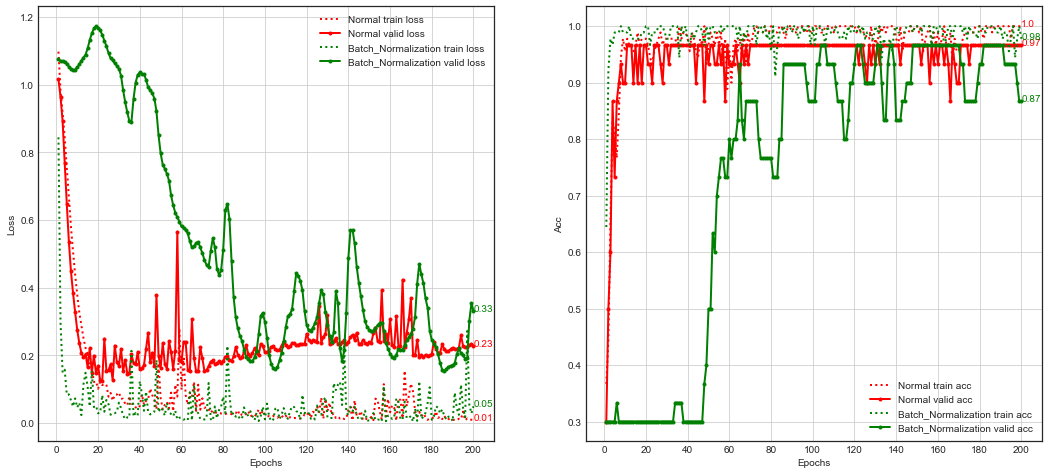

In [83]:
show_lcurve([normal_history, bn_history],["Normal", "Batch_Normalization"], size=(18, 8),x_itv=20, lw=2)